In [20]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#scale it
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train, x_val= x_train[:50000], x_train[50000:]
y_train, y_val= y_train[:50000], y_train[50000:]

In [23]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range=0.1,
    shear_range = 0.1, #Shearing is like making a square a not square thing(rhombus)
    horizontal_flip = False,
    vertical_flip = False,
)

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history1 = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs = 5, validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5522 - accuracy: 0.8344 - val_loss: 0.1438 - val_accuracy: 0.9605
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2654 - accuracy: 0.9197 - val_loss: 0.1276 - val_accuracy: 0.9603
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2303 - accuracy: 0.9297 - val_loss: 0.1200 - val_accuracy: 0.9667
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2135 - accuracy: 0.9359 - val_loss: 0.1133 - val_accuracy: 0.9656
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1911 - accuracy: 0.9424 - val_loss: 0.1112 - val_accuracy: 0.9683


In [25]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9721


[0.09645858407020569, 0.972100019454956]

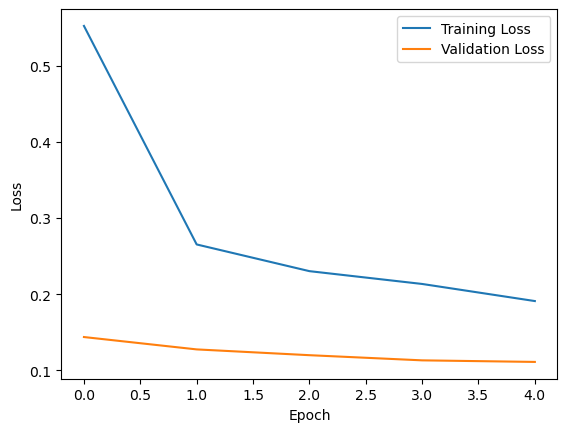

In [26]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')  # Corrected the syntax here
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

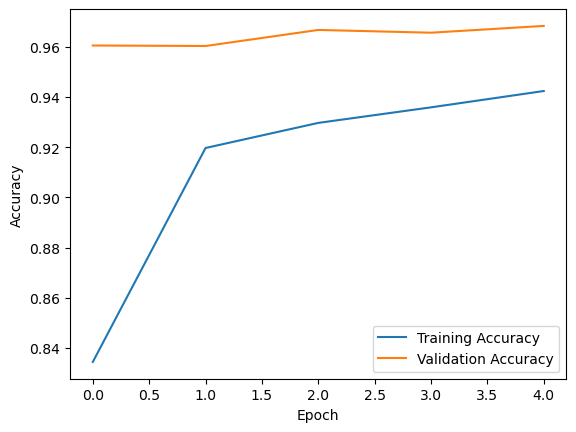

In [27]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()